## Multiple Linear Regression - Scikit Implementation


    ###Data: Weather Summary-WW2:Kaggle

In [2]:
#importing necessary packages
import pandas as pd

In [3]:
#importing WW2 weather data set
path = 'C:\\Users\\Rakib\\Downloads\\Completed Projects -- Machine Learning IBM\Regression Data Set Kaggle\
\Weather WW2 Regression Scikit - Github\\Summary of Weather.csv'
weather = pd.read_csv(path, low_memory=False)

In [5]:
#name of columns
weather.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [6]:
#headings
weather.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#some statistics
weather.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
STA,119040.0,29659.435795,20953.209402,10001.000000,11801.000000,22508.000000,33501.000000,82506.000000
WindGustSpd,532.0,37.774534,10.297808,18.520000,29.632000,37.040000,43.059000,75.932000
MaxTemp,119040.0,27.045111,8.717817,-33.333333,25.555556,29.444444,31.666667,50.000000
MinTemp,119040.0,17.789511,8.334572,-38.333333,15.000000,21.111111,23.333333,34.444444
MeanTemp,119040.0,22.411631,8.297982,-35.555556,20.555556,25.555556,27.222222,40.000000
YR,119040.0,43.805284,1.136718,40.000000,43.000000,44.000000,45.000000,45.000000
MO,119040.0,6.726016,3.425561,1.000000,4.000000,7.000000,10.000000,12.000000
DA,119040.0,15.797530,8.794541,1.000000,8.000000,16.000000,23.000000,31.000000
DR,533.0,26.998124,15.221732,2.000000,11.000000,32.000000,34.000000,78.000000
SPD,532.0,20.396617,5.560371,10.000000,16.000000,20.000000,23.250000,41.000000


In [9]:
#keeping few columns
weather = weather[['STA', 'Precip', 'WindGustSpd','MeanTemp', 'YR', 'MO', 'DA', 'DR', 'SPD', 'MAX', 'MIN', 'MEA', 'PGT']]

In [10]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 13 columns):
STA            119040 non-null int64
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MeanTemp       119040 non-null float64
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
PGT            525 non-null float64
dtypes: float64(8), int64(4), object(1)
memory usage: 11.8+ MB


In [11]:
#deal with missing values
import numpy as np
missing_data = weather.isnull()
missing_data.head()

,STA,Precip,WindGustSpd,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,PGT
0,False,False,True,False,False,False,False,True,True,False,False,False,True
1,False,False,True,False,False,False,False,True,True,False,False,False,True
2,False,False,True,False,False,False,False,True,True,False,False,False,True
3,False,False,True,False,False,False,False,True,True,False,False,False,True
4,False,False,True,False,False,False,False,True,True,False,False,False,True


In [12]:
#count missing values in each column
for column in missing_data.columns.values.tolist(): 
    print(column)
    print(missing_data[column].value_counts())
    print("")

STA
False    119040
Name: STA, dtype: int64

Precip
False    119040
Name: Precip, dtype: int64

WindGustSpd
True     118508
False       532
Name: WindGustSpd, dtype: int64

MeanTemp
False    119040
Name: MeanTemp, dtype: int64

YR
False    119040
Name: YR, dtype: int64

MO
False    119040
Name: MO, dtype: int64

DA
False    119040
Name: DA, dtype: int64

DR
True     118507
False       533
Name: DR, dtype: int64

SPD
True     118508
False       532
Name: SPD, dtype: int64

MAX
False    118566
True        474
Name: MAX, dtype: int64

MIN
False    118572
True        468
Name: MIN, dtype: int64

MEA
False    118542
True        498
Name: MEA, dtype: int64

PGT
True     118515
False       525
Name: PGT, dtype: int64



In [13]:
#excluding columns with way too many missing values
weather = weather[['STA', 'Precip','MeanTemp', 'YR', 'MO', 'DA', 'MAX', 'MIN', 'MEA']]

In [14]:
#replacing missing values with mean
avg_1 = weather['MAX'].astype('float').mean(axis=0)
weather['MAX'].replace(np.nan,avg_1,inplace=True)

In [15]:
#replacing missing values with with mean
avg_2 = weather['MIN'].astype('float').mean(axis=0)
weather['MIN'].replace(np.nan,avg_2,inplace=True)

In [16]:
#replacing missing values with mean
avg_3 = weather['MEA'].astype('float').mean(axis=0)
weather['MEA'].replace(np.nan,avg_3,inplace=True)

In [17]:
#recounting missing values again
missing_data = weather.isnull()
missing_data.head()

,STA,Precip,MeanTemp,YR,MO,DA,MAX,MIN,MEA
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [18]:
#recounting missing values in each column again
for column in missing_data.columns.values.tolist(): 
    print(column)
    print(missing_data[column].value_counts())
    print("")

STA
False    119040
Name: STA, dtype: int64

Precip
False    119040
Name: Precip, dtype: int64

MeanTemp
False    119040
Name: MeanTemp, dtype: int64

YR
False    119040
Name: YR, dtype: int64

MO
False    119040
Name: MO, dtype: int64

DA
False    119040
Name: DA, dtype: int64

MAX
False    119040
Name: MAX, dtype: int64

MIN
False    119040
Name: MIN, dtype: int64

MEA
False    119040
Name: MEA, dtype: int64



    ## We have taken care of all missing values

### Starting in a new data frame - a new start! 

In [21]:
df = weather

In [23]:
#exploring the data againa
df.head()

,STA,Precip,MeanTemp,YR,MO,DA,MAX,MIN,MEA
0,10001,1.016,23.888889,42,7,1,78.0,72.0,75.0
1,10001,0,25.555556,42,7,2,84.0,71.0,78.0
2,10001,2.54,24.444444,42,7,3,79.0,72.0,76.0
3,10001,2.54,24.444444,42,7,4,80.0,72.0,76.0
4,10001,0,24.444444,42,7,5,80.0,71.0,76.0


In [24]:
# Summary statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
STA,119040.0,29659.435795,20953.209402,10001.000000,11801.000000,22508.000000,33501.000000,82506.0
MeanTemp,119040.0,22.411631,8.297982,-35.555556,20.555556,25.555556,27.222222,40.0
YR,119040.0,43.805284,1.136718,40.000000,43.000000,44.000000,45.000000,45.0
MO,119040.0,6.726016,3.425561,1.000000,4.000000,7.000000,10.000000,12.0
DA,119040.0,15.797530,8.794541,1.000000,8.000000,16.000000,23.000000,31.0
MAX,119040.0,81.003745,14.839727,-28.000000,78.000000,85.000000,89.000000,122.0
MIN,119040.0,64.273808,14.453003,-37.000000,59.000000,70.000000,74.000000,94.0
MEA,119040.0,72.644843,14.181324,-32.000000,69.000000,78.000000,81.000000,104.0


In [25]:
#name of columns
df.columns

Index(['STA', 'Precip', 'MeanTemp', 'YR', 'MO', 'DA', 'MAX', 'MIN', 'MEA'], dtype='object')

In [26]:
#explore further
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 9 columns):
STA         119040 non-null int64
Precip      119040 non-null object
MeanTemp    119040 non-null float64
YR          119040 non-null int64
MO          119040 non-null int64
DA          119040 non-null int64
MAX         119040 non-null float64
MIN         119040 non-null float64
MEA         119040 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 8.2+ MB


    ## While trying to conver Precip into float - noticed some data entered as 'T'. 
    ## Replacing those 'T' with missing values then filling those missing values with mean

In [28]:
#replacing 'T' values in Precip columns into NaN
df['Precip'].replace('T', np.nan, inplace=True)

In [31]:
#Converting Precip into float
df[['Precip']] =df[['Precip']].astype("float")

In [34]:
#replacing missing values with Mean for the columns
avg_5 = df['Precip'].astype('float').mean(axis=0)
df['Precip'].replace(np.nan,avg_5,inplace=True)

In [35]:
df.dtypes

STA           int64
Precip      float64
MeanTemp    float64
YR            int64
MO            int64
DA            int64
MAX         float64
MIN         float64
MEA         float64
dtype: object

    ## Seems like data is ready for Linear Regression modelling
    ## Let's explore some correlation
    ## Goal is to predict Precipication based on other factors! 

In [36]:
df.corr()

,STA,Precip,MeanTemp,YR,MO,DA,MAX,MIN,MEA
STA,1.000000,0.012274,0.078112,0.121408,-0.008592,0.000903,0.083798,0.050715,0.069647
Precip,0.012274,1.000000,0.043855,0.003927,0.038246,0.000751,-0.003676,0.092629,0.045437
MeanTemp,0.078112,0.043855,1.000000,0.010681,0.050769,-0.004153,0.919436,0.917804,0.949449
YR,0.121408,0.003927,0.010681,1.000000,-0.144360,-0.011196,0.013915,-0.043109,-0.014646
MO,-0.008592,0.038246,0.050769,-0.144360,1.000000,0.006563,0.034269,0.072338,0.054747
DA,0.000903,0.000751,-0.004153,-0.011196,0.006563,1.000000,-0.003292,-0.000738,-0.002090
MAX,0.083798,-0.003676,0.919436,0.013915,0.034269,-0.003292,1.000000,0.873670,0.968215
MIN,0.050715,0.092629,0.917804,-0.043109,0.072338,-0.000738,0.873670,1.000000,0.966584
MEA,0.069647,0.045437,0.949449,-0.014646,0.054747,-0.002090,0.968215,0.966584,1.000000


    ## Looks like Precipitation has very weak correlation with other variables
    ## For the sake of finishing this project I will still complete the next steps.

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

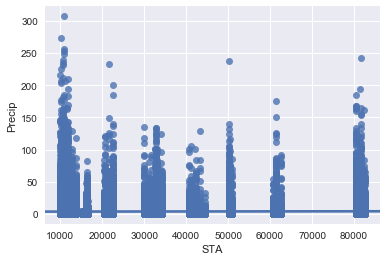

In [38]:
sns.regplot(x='STA', y='Precip', data=df)

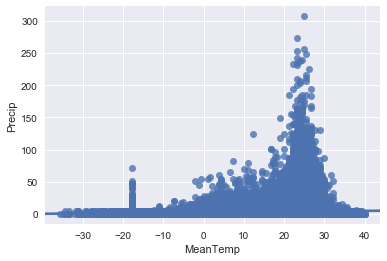

In [39]:
sns.regplot(x='MeanTemp', y='Precip', data=df)

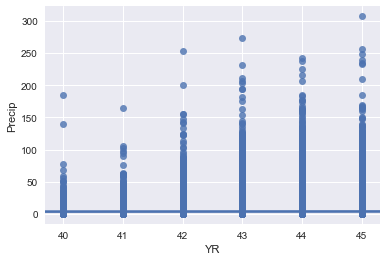

In [40]:
sns.regplot(x='YR', y='Precip', data=df)

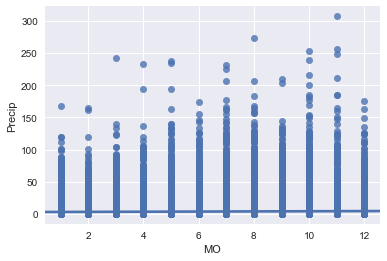

In [41]:
sns.regplot(x='MO', y='Precip', data=df)

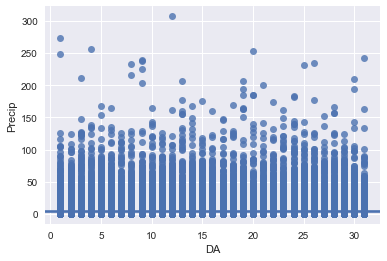

In [42]:
sns.regplot(x='DA', y='Precip', data=df)

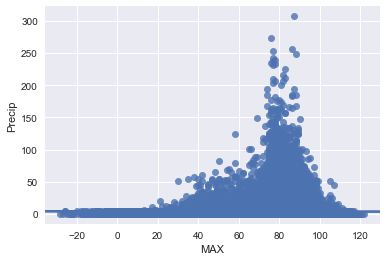

In [43]:
sns.regplot(x='MAX', y='Precip', data=df)

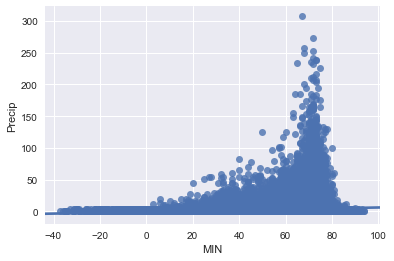

In [44]:
sns.regplot(x='MIN', y='Precip', data=df)

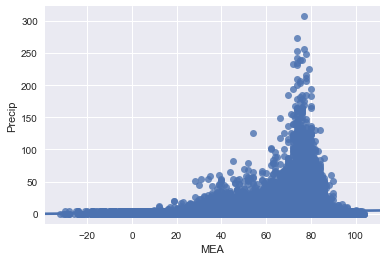

In [45]:
sns.regplot(x='MEA', y='Precip', data=df)

    ## Spliting into Features and Target (Precipitation) 

In [46]:
feature = df[['MIN', 'MAX', 'MeanTemp', 'MEA']]

In [47]:
label = df['Precip']

In [48]:
feature.head()

,MIN,MAX,MeanTemp,MEA
0,72.0,78.0,23.888889,75.0
1,71.0,84.0,25.555556,78.0
2,72.0,79.0,24.444444,76.0
3,72.0,80.0,24.444444,76.0
4,71.0,80.0,24.444444,76.0


In [49]:
label.head()

0    1.016
1    0.000
2    2.540
3    2.540
4    0.000
Name: Precip, dtype: float64

    ## Train Test Data Set

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.33, random_state=101)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79756, 4)
(39284, 4)
(79756,)
(39284,)


    ## Processing data

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

    ## Regression Model

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
#instance
regr = LinearRegression()

In [57]:
#Fit the data
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

    ## Predictions

In [58]:
y_hat = regr.predict(X_test)

    ## Evaluation of the model

In [59]:
from sklearn.metrics import r2_score

In [60]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f", np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_hat, y_test))

Mean absolute error: 4.82
Residual sum of squares (MSE): %.2f 114.90673744751895
R2-score: -25.47
